# Import

In [1]:
import pandas as pd
import numpy as np

In [2]:
import datetime
from datetime import timedelta

## Import données

In [3]:
incidents = pd.read_csv("incident_event_log.csv", sep=",")

incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [4]:
incidents.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


# Visualisation des données

In [5]:
incidents['incident_state'].value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

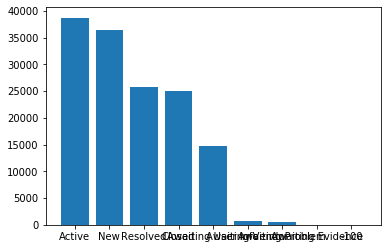

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(incidents['incident_state'].value_counts().index, incidents['incident_state'].value_counts())
plt.show()

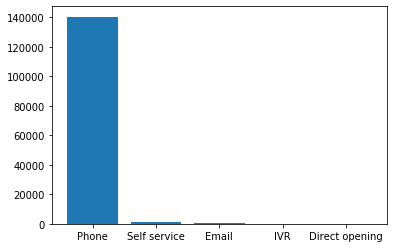

In [7]:
plt.bar(incidents['contact_type'].value_counts().index, incidents['contact_type'].value_counts())
plt.show()

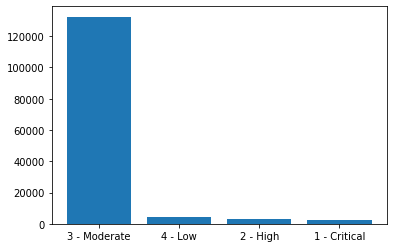

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(incidents['priority'].value_counts().index, incidents['priority'].value_counts())
plt.show()

# Data processing

## Création du dataframe avec les colonnes retenues

Après une première analyse des données du dataset, j'ai relevé celles qui pourraient permettre de prédire le temps de résolution d'un incident :


1. **incident state:** eight levels controlling the incident management process transitions from opening until closing the case;
2. **reassignment_count:** number of times the incident has the group or the support analysts changed;
3. **reopen_count:** number of times the incident resolution was rejected by the caller;
4. **sys_mod_count:** number of incident updates until that moment;
5. **made_sla:** boolean attribute that shows whether the incident exceeded the target SLA;
6. **sys_updated_at:** incident system update date and time; 
7. **contact_type:** categorical attribute that shows by what means the incident was reported;
8. **category:** first-level description of the affected service;
9. **subcategory:** second-level description of the affected service (related to the first level description, i.e., to category);
10. **u_symptom:** description of the user perception about service availability;
11. **impact:** description of the impact caused by the incident (values: 1-High; 2-Medium; 3-Low);
12. **urgency:** description of the urgency informed by the user for the incident resolution (values: 1-High; 2-Medium; 3-Low);
13. **priority:** calculated by the system based on 'impact' and 'urgency';
14. **knowledge:** boolean attribute that shows whether a knowledge base document was used to resolve the incident;
15. **u_priority_confirmation:** boolean attribute that shows whether the priority field has been double-checked;
16. **notify:** categorical attribute that shows whether notifications were generated for the incident;
17. **closed_at:** incident user close date and time (dependent variable).





In [9]:
datas = incidents.loc[:, ['incident_state','reassignment_count','reopen_count','sys_mod_count',\
                          'made_sla','sys_updated_at','contact_type','category',\
                          'subcategory','u_symptom','impact','urgency','priority','knowledge','u_priority_confirmation',\
                          'notify','closed_at']]
datas.head()

,incident_state,reassignment_count,reopen_count,sys_mod_count,made_sla,sys_updated_at,contact_type,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,notify,closed_at
0,New,0,0,0,True,29/2/2016 01:23,Phone,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,5/3/2016 12:00
1,Resolved,0,0,2,True,29/2/2016 08:53,Phone,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,5/3/2016 12:00
2,Resolved,0,0,3,True,29/2/2016 11:29,Phone,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,5/3/2016 12:00
3,Closed,0,0,4,True,5/3/2016 12:00,Phone,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,5/3/2016 12:00
4,New,0,0,0,True,29/2/2016 04:57,Phone,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,6/3/2016 10:00


In [10]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 17 columns):
incident_state             141712 non-null object
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null object
u_symptom                  141712 non-null object
impact                     141712 non-null object
urgency                    141712 non-null object
priority                   141712 non-null object
knowledge                  141712 non-null bool
u_priority_confirmation    141712 non-null bool
notify                     141712 non-null object
closed_at                  141712 non-null object
dtypes: bool(3), int64(3), object(11)
memory usa

## Ajout de colonnes

### Remaining time

In [11]:
# Ajout de la colonne "remaining_time" qui correspond au temps restant avant résolution de l'incident
# (en heures)
datetimeFormat = '%d/%m/%Y %H:%M'
datas['remaining_time'] = datas.apply(lambda row: (datetime.datetime.strptime(row.closed_at, datetimeFormat)\
    - datetime.datetime.strptime(row.sys_updated_at, datetimeFormat)).total_seconds()/3600, axis=1)

# Supression de la colonne "closed_at"
# (plus d'utilité après le calcul de "remaining_time")
del datas['closed_at']

## Transformation des données catégoriques

In [12]:
# uniquement les données de type 'object'
datas.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 10 columns):
incident_state    141712 non-null object
sys_updated_at    141712 non-null object
contact_type      141712 non-null object
category          141712 non-null object
subcategory       141712 non-null object
u_symptom         141712 non-null object
impact            141712 non-null object
urgency           141712 non-null object
priority          141712 non-null object
notify            141712 non-null object
dtypes: object(10)
memory usage: 10.8+ MB


### Incident state

In [13]:
datas['incident_state'].value_counts()
# Il existe 8 différents "incident_state" + 1 state non-identifié (-100)

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [14]:
# On remplace les status "-100" par "Unknown"
datas.loc[datas.incident_state == '-100', 'incident_state'] = "Unknown"

# On remplace les status " " par "_"
datas['incident_state'] = datas.apply(lambda row: row.incident_state.replace(" ", "_"),axis=1)

In [15]:
# On crée autant de nouvelles colonnes qu'il y a de "incident_state"
datas = pd.get_dummies(datas, columns=['incident_state'], prefix = ['state'])

### Sys Updated at

In [16]:
datas['sys_updated_at'] = datas['sys_updated_at'].astype('datetime64')  # change dtype en "datetime64"

# On ajoute les colonnes indiquant la date de l'update
datas['update_month'] = datas['sys_updated_at'].dt.month
datas['update_day'] = datas['sys_updated_at'].dt.day
datas['update_hour'] = datas['sys_updated_at'].dt.hour
datas['update_weekday'] = datas['sys_updated_at'].dt.weekday

# Supression de la colonne "sys_updated_at"
del datas['sys_updated_at']

# On crée autant de nouvelles colonnes qu'il y a de "weekday"
datas = pd.get_dummies(datas, columns=['update_weekday'], prefix = ['update_weekday'])

### Contact type

In [17]:
# Il y a 5 types de contacts
datas['contact_type'].value_counts()

Phone             140462
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: contact_type, dtype: int64

In [18]:
# On crée autant de nouvelles colonnes qu'il y a de types de contact
# Le type de contact sera alors précisé par un 1 (0 dans le cas contraire)
datas = pd.get_dummies(datas, columns=['contact_type'], prefix = ['contact'])

### Category / Subcategory / Symptom

In [19]:
# Pour ces trois colonnes, on ne gardera que leur numéro

**Pour la colonne "category"**

In [20]:
# On remplace les status "?" par "-1"
datas.loc[datas.category == '?', 'category'] = "-1"

# On garde uniquement le numéro de la categorie
datas['category'] = datas.apply(lambda row: int(row.category.replace("Category ","")), axis=1)

**Pour la colonne "subcategory"**

In [21]:
# On remplace les status "?" par "-1"
datas.loc[datas.subcategory == '?', 'subcategory'] = "-1"

# On garde uniquement le numéro de la categorie
datas['subcategory'] = datas.apply(lambda row: int(row.subcategory.replace("Subcategory ","")), axis=1)

**Pour la colonne "u_symptom"**

In [22]:
# On remplace les status "?" par "-1"
datas.loc[datas.u_symptom == '?', 'u_symptom'] = "-1"

# On garde uniquement le numéro de la categorie
datas['u_symptom'] = datas.apply(lambda row: int(row.u_symptom.replace("Symptom ","")), axis=1)

### Impact / Urgency / Priority

In [23]:
# Les données de ces trois colonnes seront converties en int
# en suivant l'ordre d'importance prédéfini par le dataset d'origine

**Pour la colonne impact :**

In [24]:
datas['impact'].value_counts()

2 - Medium    134335
3 - Low         3886
1 - High        3491
Name: impact, dtype: int64

In [25]:
replace_map_impact = {'impact': {'1 - High': 1, '2 - Medium': 2, '3 - Low': 3}}
datas.replace(replace_map_impact, inplace=True)

**Pour la colonne urgency :**

In [26]:
datas['urgency'].value_counts()

2 - Medium    134094
1 - High        4020
3 - Low         3598
Name: urgency, dtype: int64

In [27]:
replace_map_urgency = {'urgency': {'1 - High': 1, '2 - Medium': 2, '3 - Low': 3}}
datas.replace(replace_map_urgency, inplace=True)

**Pour la colonne impact :**

In [28]:
datas['priority'].value_counts()

3 - Moderate    132452
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: priority, dtype: int64

In [29]:
replace_map_priority = {'priority': {'1 - Critical': 1, '2 - High': 2, '3 - Moderate': 3, '4 - Low': 4}}
datas.replace(replace_map_priority, inplace=True)

### Notify

In [30]:
datas['notify'].value_counts()

Do Not Notify    141593
Send Email          119
Name: notify, dtype: int64

In [31]:
# Ici, il n'y a que 2 catégories : 
# "Do Not Notify"   --->    0
# "Send Email"      --->    1

replace_map_notify = {'notify': {'Do Not Notify': 0, 'Send Email': 1}}
datas.replace(replace_map_notify, inplace=True)

## Résultat final

In [32]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 38 columns):
reassignment_count          141712 non-null int64
reopen_count                141712 non-null int64
sys_mod_count               141712 non-null int64
made_sla                    141712 non-null bool
category                    141712 non-null int64
subcategory                 141712 non-null int64
u_symptom                   141712 non-null int64
impact                      141712 non-null int64
urgency                     141712 non-null int64
priority                    141712 non-null int64
knowledge                   141712 non-null bool
u_priority_confirmation     141712 non-null bool
notify                      141712 non-null int64
remaining_time              141712 non-null float64
state_Active                141712 non-null uint8
state_Awaiting_Evidence     141712 non-null uint8
state_Awaiting_Problem      141712 non-null uint8
state_Awaiting_User_Info    141712 non-n

In [33]:
datas.head().T

,0,1,2,3,4
reassignment_count,0,0,0,0,0
reopen_count,0,0,0,0,0
sys_mod_count,0,2,3,4,0
made_sla,True,True,True,True,True
category,55,55,55,55,40
subcategory,170,170,170,170,215
u_symptom,72,72,72,72,471
impact,2,2,2,2,2
urgency,2,2,2,2,2
priority,3,3,3,3,3


# Modélisation

## X et y

In [34]:
X_all = datas.drop(['remaining_time'], axis=1)
y_all = datas['remaining_time']

## Training set et Testing set

In [35]:
from sklearn.model_selection import train_test_split

num_test = 0.25
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

# Ajustement et réglage d'algorithmes

## RandomForest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
algo = RandomForestRegressor(n_estimators=50)
model = algo.fit(X_train, y_train)
score = model.score(X_test,y_test)
score

0.45063362585245226

In [39]:
import pickle

# Sauvegarde du model dans le répertoire de l'API pour la prédiction
filename = 'incidentapi/predicteur_app/rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [40]:
# Test
filename = 'rf_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.4526300509118817
